In [286]:
# Import the libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [287]:
# Read training data from data_prob_01.txt and store in a numpy array called 'x'.
# As 40 data points are present, 'x' will be a 40x2 array where each row is one data point.
# Store the labels in 'y'. It will be 40 length numpy array.
# Each data is two dimensional and labels are +1 for the positive class while -1
# for the negative class
fileName="C:/Users/BRAVO15/Desktop/Machine-Learning-Practice/PLA/data.txt"
with open(fileName) as file:
    lines =  [line.split() for line in file ]   
data = np.array(lines,dtype='float32')
X = data[:,:2]
y = data[:,-1]

In [288]:
# Initialize weight
w = np.array([0.0, 0.0]) #
# while no examples are misclassified run the perceptron algorithm (refer to the slides for the algorithm)
########################## write your code below ##############################################
# Make a prediction with weights
def predict(row, weights):
    activation = 0.0
    for i in range(len(row)-1):
        activation += weights[i] * row[i]
    return 1.0 if activation >= 0.0 else -1.0
    
# Estimate Perceptron weights using Perceptron Learning Algorithm   
def train_weights(weights,train):
    misclassification=1
    while misclassification!=0:
        misclassification= 40   # assuming initially all training examples are misclassified
        i=0
        a = 0
        for row in train:
            prediction = predict(row, weights)
            if row[-1]!= prediction:
                misclassification+=1  
                a = a+1
                print(a)              
                for j in range(len(row)-1):
                    #print(row[j])
                    weights[j] = weights[j] + row[-1] * row[j]
                    print(weights[j])
            else:
                misclassification-=1
            i+=1
    return weights

# Calculate weights
weights = train_weights(w,data)
#print("trained weights : {}".format(weights))
i=0
for row in data:
    prediction = predict(row, weights)
    #print("%d Expected=%d, Predicted=%d" % (i,row[-1], prediction))
    i+=1
# Finally w contains the trained weights
###############################################################################################

1
9.820500373840332
-6.660999774932861
2
12.061000347137451
-3.046499729156494
3
12.65600037574768
3.393700122833252
4
10.65600037574768
7.393700122833252


In [289]:
weights

array([10.65600038,  7.39370012])

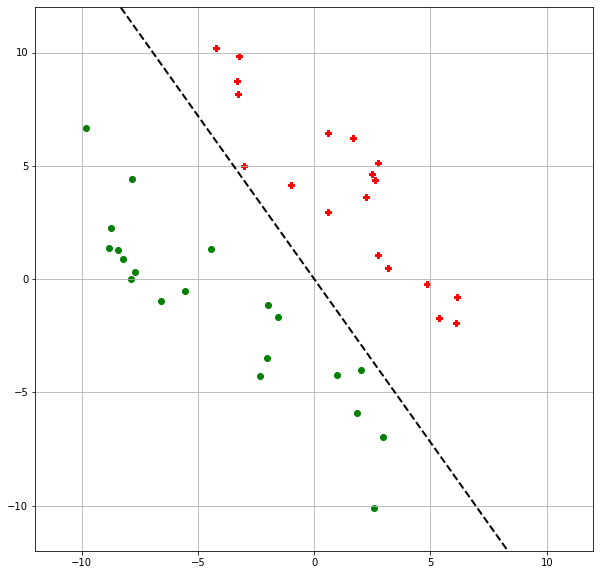

In [290]:
# weightplot
epsilon=1e-18
indexes_with_class1 = y==1
plt.figure(figsize=(10,10))
plt.scatter(X[indexes_with_class1][:,0],X[indexes_with_class1][:,1], color='r', marker='P')
plt.scatter(X[~indexes_with_class1][:,0],X[~indexes_with_class1][:,1], color='g', marker='o')
plt.grid()

plt.xlim(-12,12)
plt.ylim(-12,12)
slope = (-weights[0])/(weights[1]) # to ensure no division by zero
xx = np.linspace(-15, 15)
yy = slope * xx
plt.plot(xx,yy,color='k', linestyle='--', linewidth=2)
plt.show()

In [291]:
slope

-1.441227017422546